In [9]:
import h5py
import matplotlib.pyplot as plt

In [10]:
f = h5py.File('data/Outfile_CellInformation.h5')

In [11]:
for x in f.keys():
    print(x)

MidPoint_X_Layer1
MidPoint_X_Layer2
MidPoint_X_Layer3
MidPoint_X_Layer4
MidPoint_X_Layer5
MidPoint_X_Layer6
MidPoint_Y_Layer1
MidPoint_Y_Layer2
MidPoint_Y_Layer3
MidPoint_Y_Layer4
MidPoint_Y_Layer5
MidPoint_Y_Layer6
MidPoint_Z_Layer1
MidPoint_Z_Layer2
MidPoint_Z_Layer3
MidPoint_Z_Layer4
MidPoint_Z_Layer5
MidPoint_Z_Layer6
Predicted_NeutralEnergy_Layer1
Predicted_NeutralEnergy_Layer2
Predicted_NeutralEnergy_Layer3
Predicted_NeutralEnergy_Layer4
Predicted_NeutralEnergy_Layer5
Predicted_NeutralEnergy_Layer6
RealRes_ChargedEnergy_Layer1
RealRes_ChargedEnergy_Layer2
RealRes_ChargedEnergy_Layer3
RealRes_ChargedEnergy_Layer4
RealRes_ChargedEnergy_Layer5
RealRes_ChargedEnergy_Layer6
RealRes_NeutralEnergy_Layer1
RealRes_NeutralEnergy_Layer2
RealRes_NeutralEnergy_Layer3
RealRes_NeutralEnergy_Layer4
RealRes_NeutralEnergy_Layer5
RealRes_NeutralEnergy_Layer6
RealRes_TotalEnergy_Layer1
RealRes_TotalEnergy_Layer2
RealRes_TotalEnergy_Layer3
RealRes_TotalEnergy_Layer4
RealRes_TotalEnergy_Layer5
RealRes

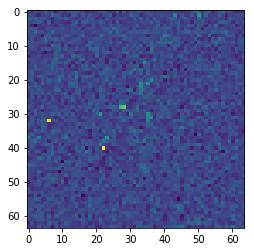

In [30]:
plt.imshow( f['UniformRes_TotalEnergy_Layer3'][25].reshape(64,64) )

(array([54.,  6., 12.,  5.,  1.,  0.,  1.,  1.,  0.,  1.]),
 array([ 10.45002 ,  30.636353,  50.822685,  71.00902 ,  91.19535 ,
        111.38168 , 131.56801 , 151.75435 , 171.94067 , 192.12701 ,
        212.31334 ], dtype=float32),
 <a list of 10 Patch objects>)

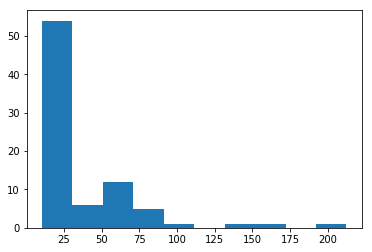

In [38]:
plt.hist( f['UniformRes_ChargedEnergy_Layer3'][25].flatten()[f['UniformRes_ChargedEnergy_Layer3'][25].flatten() > 10] )

(array([295., 351., 292., 317., 315., 307., 325., 310., 317., 171.]),
 array([14809.486, 16395.89 , 17982.293, 19568.697, 21155.1  , 22741.504,
        24327.908, 25914.31 , 27500.715, 29087.117, 30673.521],
       dtype=float32),
 <a list of 10 Patch objects>)

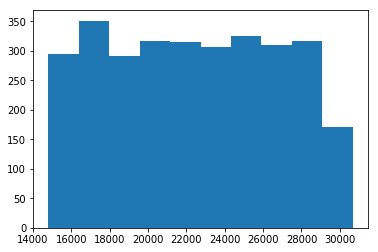

In [22]:
plt.hist( f['Smeared_Track_Energy'][:] )

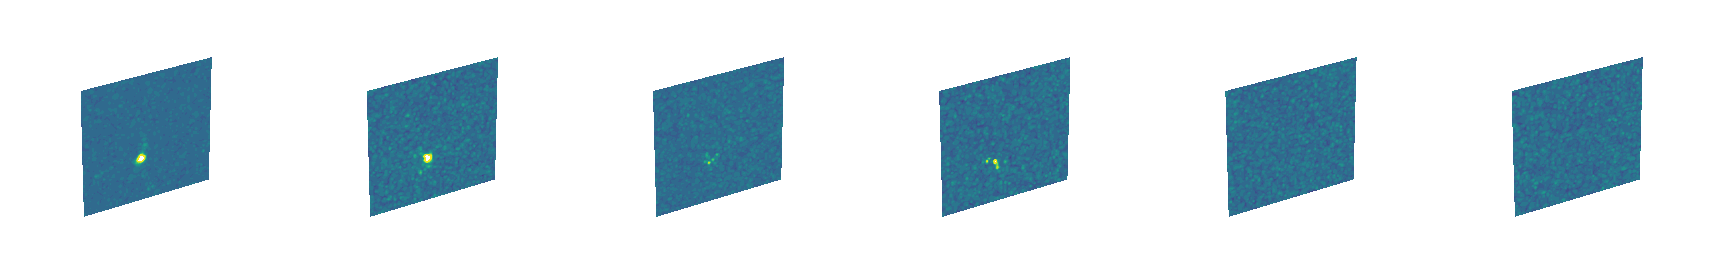

In [87]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt,numpy as np

event_index = 423

fig = plt.figure(figsize=(6*4,4))

Z, Y = np.meshgrid(range(64),range(64))

ax_list = []
for layer_i in range(6):
    ax_list.append( fig.add_subplot(1, 6, layer_i+1, projection='3d') ) 
    
    ax_list[-1].view_init(elev=30, azim=-30)
    
    X = f['UniformRes_TotalEnergy_Layer'+str(layer_i+1)][event_index].reshape(64,64)
    ax_list[-1].contourf(X, Y, Z, zdir='x', offset=2.5,
        levels=np.linspace(-100,200,20))
    
    ax_list[-1].set_xlabel('X')
    ax_list[-1].set_xlim(0,5)
    ax_list[-1].set_ylabel('Y')
    ax_list[-1].set_ylim(0, 64)
    ax_list[-1].set_zlabel('Z')
    ax_list[-1].set_zlim(0, 64)
    ax_list[-1].set_axis_off()
    
plt.tight_layout()    
plt.show()